In [1]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
from datetime import datetime

FOLDER = 'out'

import matplotlib.pyplot as plt
import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

In [2]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 3


In [3]:

compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    summary = {
        'size': res_full['train_size'],
        #'representation': res_full['data_summary']['representation'],
        'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true'])),
        'test_size': len(res['all_y_true'])
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)
print(compiled_res_list)

[{'size': 1000, 'target': 'y_bin', 'accuracy': 0.88125, 'f1_macro': 0.8811301717837938, 'f1_micro': 0.88125, 'kappa': 0.7625, 'num_epochs': 4, 'lr': 0.0003, 'bins': 2, 'test_size': 4000}, {'size': 1000, 'target': 'y_bin', 'accuracy': 0.88275, 'f1_macro': 0.8827151004120664, 'f1_micro': 0.88275, 'kappa': 0.7655000000000001, 'num_epochs': 4, 'lr': 0.0003, 'bins': 2, 'test_size': 4000}, {'size': 1000, 'target': 'y_bin', 'accuracy': 0.87925, 'f1_macro': 0.8792097693037888, 'f1_micro': 0.87925, 'kappa': 0.7585, 'num_epochs': 4, 'lr': 0.0003, 'bins': 2, 'test_size': 4000}]


In [4]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['bins', 'num_epochs', 'target', 'size']).agg(['mean', 'sem'])


In [5]:
grouped_res


accuracy            f1_macro            f1_micro  \
                                 mean       sem      mean       sem      mean   
bins num_epochs target size                                                     
2    4          y_bin  1000  0.881083  0.001014  0.881018  0.001013  0.881083   

                                          kappa                lr       \
                                  sem      mean       sem    mean  sem   
bins num_epochs target size                                              
2    4          y_bin  1000  0.001014  0.762167  0.002028  0.0003  0.0   

                            test_size       
                                 mean  sem  
bins num_epochs target size                 
2    4          y_bin  1000    4000.0  0.0

# Plot Confusion Matrices

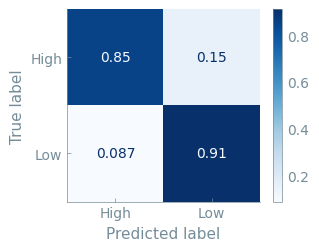

<Figure size 330x250 with 0 Axes>

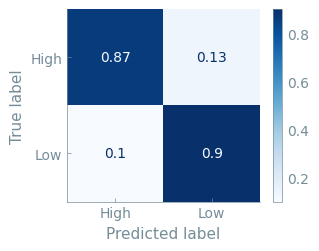

<Figure size 330x250 with 0 Axes>

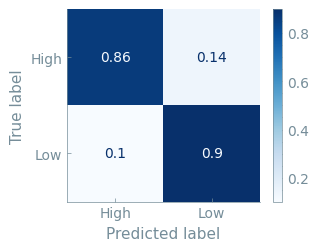

<Figure size 330x250 with 0 Axes>

In [6]:
from sklearn import metrics
import numpy as np
for index, _ in enumerate(conf_mats):
    try:
        preds = conf_mats[index]
        actual	= preds['all_y_true']
        predicted	= preds['all_y_pred']

        gpt_metrics = compiled_res.iloc[index]
        confusion_matrix = metrics.confusion_matrix(actual, predicted)
        confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_normalized, display_labels = ['High','Low'])
        cm_display.plot(cmap=plt.cm.Blues)

        #cm_display.plot()


        if not os.path.exists('ConfusionMatrices'):
            os.mkdir('ConfusionMatrices')
        plt.savefig(f'ConfusionMatrices/testData_{index}_normalized.pdf', bbox_inches = 'tight')
        #plt.tight_layout()
        plt.show()

    except Exception as e:
        print(e)
    plt.clf()